In [22]:
from numpy import *
from numpy.random import *
from math import sqrt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

In [23]:
def objective(x, y):
 return x**2.0 + y**2.0 + 2*x - y

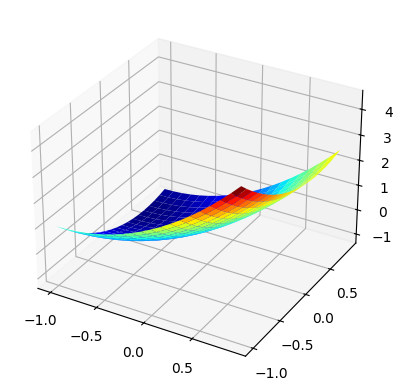

In [24]:

# Define range for input
r_min, r_max = -1.0, 1.0
# Sample input range uniformly at 0.1 increments
xaxis = arange(r_min, r_max, 0.1)
yaxis = arange(r_min, r_max, 0.1)
# Create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# Compute targets
results = objective(x, y)

# Create a surface plot with the jet color scheme
figure = pyplot.figure()
axis = figure.add_subplot(111, projection='3d')
axis.plot_surface(x, y, results, cmap='jet')

# Show the plot
pyplot.show()

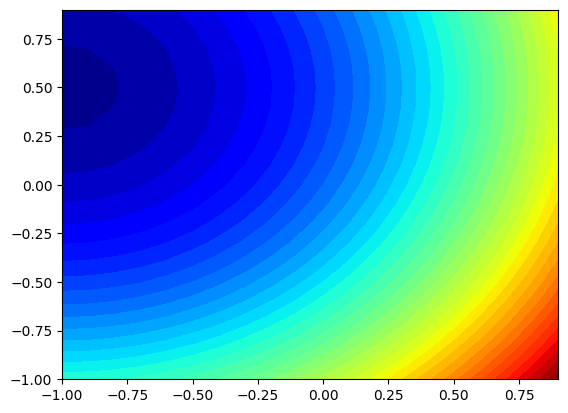

In [25]:
 
# define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# compute targets
results = objective(x, y)
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# show the plot
pyplot.show()

>0 f([-0.26595598  0.5406489 ]) = -0.70953
>1 f([-0.33221004  0.48394908]) = -0.80380
>2 f([-0.38402245  0.50590187]) = -0.87054
>3 f([-0.42731986  0.4978158 ]) = -0.92203
>4 f([-0.46482369  0.50082206]) = -0.96359
>5 f([-0.49804716  0.49968498]) = -0.99804
>6 f([-0.52793374  0.50012291]) = -1.02715
>7 f([-0.55511861  0.49995118]) = -1.05208
>8 f([-0.58005373  0.50001973]) = -1.07365
>9 f([-0.60307448  0.49999188]) = -1.09245
>10 f([-0.62443802  0.5000034 ]) = -1.10895
>11 f([-0.64434687  0.49999856]) = -1.12351
>12 f([-0.66296404  0.50000063]) = -1.13641
>13 f([-0.68042322  0.49999972]) = -1.14787
>14 f([-0.69683574  0.50000012]) = -1.15809
>15 f([-0.71229567  0.49999994]) = -1.16723
>16 f([-0.7268834   0.50000003]) = -1.17541
>17 f([-0.74066836  0.49999999]) = -1.18275
>18 f([-0.75371113  0.50000001]) = -1.18934
>19 f([-0.76606496  0.5       ]) = -1.19527
>20 f([-0.77777708  0.5       ]) = -1.20062
>21 f([-0.78888961  0.5       ]) = -1.20543
>22 f([-0.79944041  0.5       ]) = -1.2097

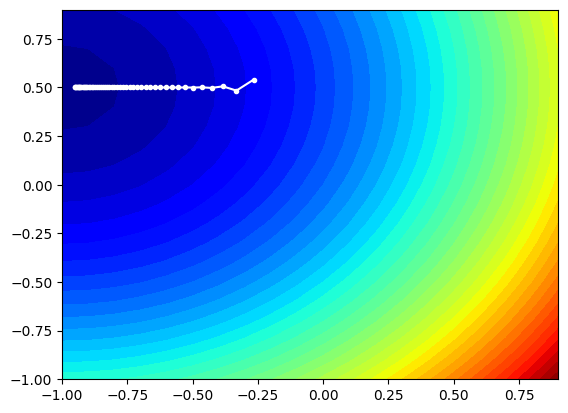

In [27]:
# Derivative of the objective function
def derivative(x, y):
    return asarray([x * 2.0 + 2.0, y * 2.0 - 1])

# RMSprop gradient descent algorithm
def rmsprop(objective, derivative, bounds, n_iter, step_size, rho):
    # Track all solutions
    solutions = list()
    # Generate an initial point
    solution = bounds[:, 0] + rand(len(bounds)) * (bounds[:, 1] - bounds[:, 0])
    # List of the average square gradients for each variable
    sq_grad_avg = [0.0 for _ in range(bounds.shape[0])]
    # Run the gradient descent
    for it in range(n_iter):
        # Calculate gradient
        gradient = derivative(solution[0], solution[1])
        # Update the average of the squared partial derivatives
        for i in range(gradient.shape[0]):
            # Calculate the squared gradient
            sg = gradient[i]**2.0
            # Update the moving average of the squared gradient
            sq_grad_avg[i] = (sq_grad_avg[i] * rho) + (sg * (1.0 - rho))
        # Build new solution
        new_solution = list()
        for i in range(solution.shape[0]):
            # Calculate the learning rate for this variable
            alpha = step_size / (1e-8 + sqrt(sq_grad_avg[i]))
            # Calculate the new position in this variable
            value = solution[i] - alpha * gradient[i]
            new_solution.append(value)
        # Store the new solution
        solution = asarray(new_solution)
        solutions.append(solution)
        # Evaluate candidate point
        solution_eval = objective(solution[0], solution[1])
        # Report progress
        print(f'>{it} f({solution}) = {solution_eval:.5f}')
    return solutions

# Seed the pseudo random number generator
seed(1)
# Define range for input
bounds = asarray([[-1.0, 1.0], [-1.0, 1.0]])
# Define the total iterations
n_iter = 50
# Define the step size
step_size = 0.01
# Momentum for RMSprop
rho = 0.99
# Perform the gradient descent search with RMSprop
solutions = rmsprop(objective, derivative, bounds, n_iter, step_size, rho)

# Sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0, 0], bounds[0, 1], 0.1)
yaxis = arange(bounds[1, 0], bounds[1, 1], 0.1)
# Create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
# Compute targets
results = objective(x, y)
# Create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# Plot the solution path as white circles
solutions = asarray(solutions)
pyplot.plot(solutions[:, 0], solutions[:, 1], '.-', color='w')
# Show the plot
pyplot.show()
